# Ford GoBike System Data Exploration
## by Martin Tschendel

## Investigation Overview

I investigate a data set what includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Source of data: https://www.fordgobike.com/system-data

## Dataset Overview

There are nearly 1.9 Mio.individual ride entries in this dataset and they have 10 features. We can find variables with quantitative nature like the duration of each ride (duration_sec) and categorical variables like type of users (user_type).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load in the datasets 
data_1801 = pd.read_csv('data/201801-fordgobike-tripdata.csv')
data_1802 = pd.read_csv('data/201802-fordgobike-tripdata.csv')
data_1803 = pd.read_csv('data/201803-fordgobike-tripdata.csv')
data_1804 = pd.read_csv('data/201804-fordgobike-tripdata.csv')
data_1805 = pd.read_csv('data/201805-fordgobike-tripdata.csv')
data_1806 = pd.read_csv('data/201806-fordgobike-tripdata.csv')
data_1807 = pd.read_csv('data/201807-fordgobike-tripdata.csv')
data_1808 = pd.read_csv('data/201808-fordgobike-tripdata.csv')
data_1809 = pd.read_csv('data/201809-fordgobike-tripdata.csv')
data_1810 = pd.read_csv('data/201810-fordgobike-tripdata.csv')
data_1811 = pd.read_csv('data/201811-fordgobike-tripdata.csv')
data_1812 = pd.read_csv('data/201812-fordgobike-tripdata.csv')

In [3]:
#join dataframes along rows
df_18 = pd.concat([data_1801, data_1802, data_1803, data_1804,
                  data_1805, data_1806, data_1807, data_1808,
                  data_1809, data_1810, data_1811, data_1812,], sort=True)

In [4]:
# Change datetype of columns start_time and end_time to datetime
df_18.start_time = pd.to_datetime(df_18.start_time)

In [5]:
df_18.end_time = pd.to_datetime(df_18.end_time)

In [6]:
# Change data type from object to category
df_18.user_type = df_18.user_type.astype('category')

In [7]:
# Convert the start_station_id and end_station_id column's data type from a float to a 
# string using astype, remove the '.0' using string slicing, and convert datatype from a string to a ctegory 
df_18.start_station_id = df_18.start_station_id.astype(str).str[:-2]
df_18.start_station_id = df_18.start_station_id.astype('category')
df_18.end_station_id = df_18.end_station_id.astype(str).str[:-2]
df_18.end_station_id = df_18.end_station_id.astype('category')

### Main Questions

* When are most trips taken in terms of time of day, day of the week, or month of the year?
* How long does the average trip take?
* Does the above depend on if a user is a subscriber or customer?
* Where are the stations located and how how many bikes are rented there per year?

## Univariate Exploration

**Number of Rides Across Different Hours of the Day**<br>
At first we will start to look at the distribution of rides across different times intervalls: time of day, day of the week and month of the year. Here we want to find answers to the question: When are most trips taken in terms of time of day, day of the week, or month of the year?


In [8]:
#extract the starting hours of each ride, store them in a series and convert series to dataframe
df_18['hour'] = df_18.start_time.dt.hour

In [9]:
df_18.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,hour
0,2765,No,75284,285,37.783521,-122.431158,Webster St at O'Farrell St,2018-02-01 19:47:19.824,1986.0,Male,120,37.761420,-122.426435,Mission Dolores Park,2018-01-31 22:52:35.239,Subscriber,22
1,2815,No,85422,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-01 15:57:17.310,NaN,NaN,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-31 16:13:34.351,Customer,16
2,3039,No,71576,296,37.325998,-121.877120,5th St at Virginia St,2018-02-01 10:16:52.116,1996.0,Male,304,37.348759,-121.894798,Jackson St at 5th St,2018-01-31 14:23:55.889,Customer,14
3,321,No,61076,47,37.780955,-122.399749,4th St at Harrison St,2018-02-01 07:51:20.500,NaN,NaN,75,37.773793,-122.421239,Market St at Franklin St,2018-01-31 14:53:23.562,Customer,14
4,617,No,39966,19,37.788975,-122.403452,Post St at Kearny St,2018-02-01 06:58:31.053,1991.0,Male,74,37.776435,-122.426244,Laguna St at Hayes St,2018-01-31 19:52:24.667,Subscriber,19


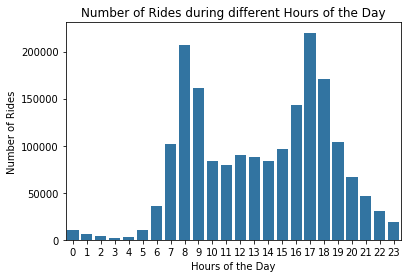

In [10]:
#plot the number of rides per hour of the day
base_color = sb.color_palette()[0]
sb.countplot(data = df_18, x = 'hour', color = base_color);
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Rides")
plt.title("Number of Rides during different Hours of the Day");

## Observations and next steps
We can see that most of the rides happen in the morning and evening times during the peak hours. Next, we examine distribution of rides across different days of the week.

**Number of Rides Across Different Days of the Week**

In [11]:
#extract the weekdays of each ride, store them in a series and convert series to dataframe
df_18['weekday'] = df_18['start_time'].dt.weekday_name

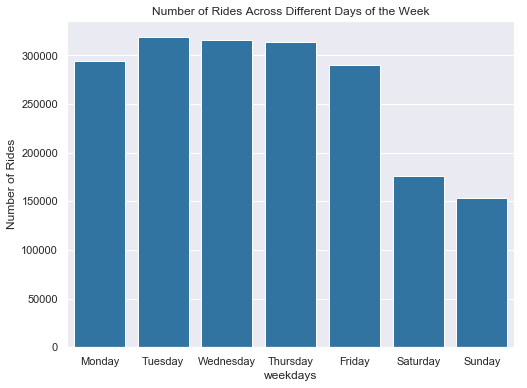

In [12]:
#plot the number of rides in different weekdays
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.set(rc={'figure.figsize':(8,6)})
sb.countplot(data = df_18, x = 'weekday', color = base_color, order = order);
plt.xlabel("weekdays")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Across Different Days of the Week");

## Observations and next steps
We can see that most of the rides happen during the working days. Fewer rides happen during the weekends. Next, we examine distribution of rides across different months of the year.

**Number of Rides across Different Months of the Year**

In [13]:
#extract the months of each ride, store them in a series and convert series to dataframe
df_18['month'] = df_18['start_time'].dt.month

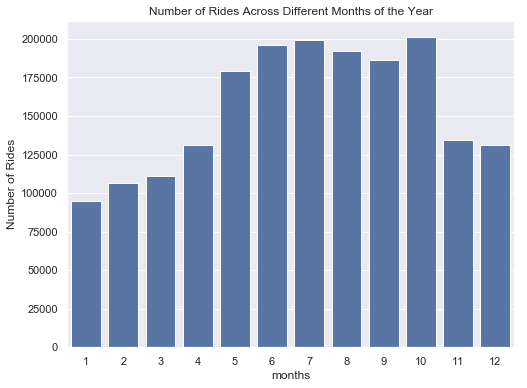

In [14]:
#plot the number of rides in different months
base_color = sb.color_palette()[0]
sb.countplot(data = df_18, x = 'month', color = base_color);
plt.xlabel("months")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Across Different Months of the Year");

## Observations and next steps
We can see that most of the rides happen during the summer and autumn. Fewer rides happen during the winter months. Different to the winter months, October has normally warm temperatures and few rainy days in the Bay Area. Next, we only examine number of rides across hours during working days or weekends. 

**Number of Rides Across Hours During Working Days or Weekends**

In [15]:
df_18.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,hour,weekday,month
0,2765,No,75284,285,37.783521,-122.431158,Webster St at O'Farrell St,2018-02-01 19:47:19.824,1986.0,Male,120,37.761420,-122.426435,Mission Dolores Park,2018-01-31 22:52:35.239,Subscriber,22,Wednesday,1
1,2815,No,85422,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-01 15:57:17.310,NaN,NaN,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-31 16:13:34.351,Customer,16,Wednesday,1
2,3039,No,71576,296,37.325998,-121.877120,5th St at Virginia St,2018-02-01 10:16:52.116,1996.0,Male,304,37.348759,-121.894798,Jackson St at 5th St,2018-01-31 14:23:55.889,Customer,14,Wednesday,1
3,321,No,61076,47,37.780955,-122.399749,4th St at Harrison St,2018-02-01 07:51:20.500,NaN,NaN,75,37.773793,-122.421239,Market St at Franklin St,2018-01-31 14:53:23.562,Customer,14,Wednesday,1
4,617,No,39966,19,37.788975,-122.403452,Post St at Kearny St,2018-02-01 06:58:31.053,1991.0,Male,74,37.776435,-122.426244,Laguna St at Hayes St,2018-01-31 19:52:24.667,Subscriber,19,Wednesday,1


In [16]:
df_18_1 = df_18.copy()

In [17]:
#select rides, what happen during working days
options_1 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_18_1 = df_18_1[df_18_1['weekday'].isin(options_1)]

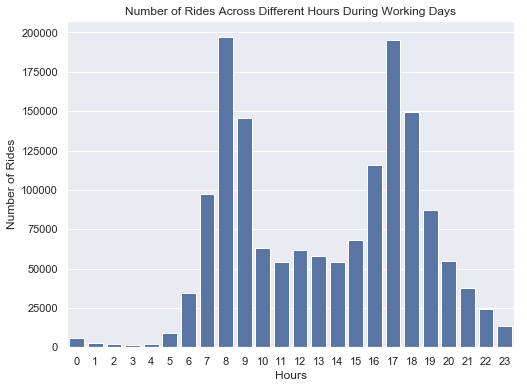

In [18]:
#plot the number of rides during different hours in working days
base_color = sb.color_palette()[0]
sb.countplot(data = df_18_1, x = 'hour', color = base_color);
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Across Different Hours During Working Days");

In [19]:
df_18_2 = df_18.copy()

In [20]:
#select rides, what happen during weekends
options_2 = ['Saturday', 'Sunday']
df_18_2 = df_18_2[df_18_2['weekday'].isin(options_2)]

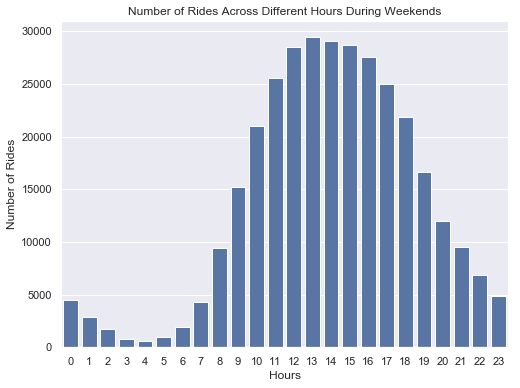

In [21]:
#plot the number of rides during different hours in the weekend 
base_color = sb.color_palette()[0]
sb.countplot(data = df_18_2, x = 'hour', color = base_color);
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Across Different Hours During Weekends");

## Observations
There is a clear difference in the distribution of rides across hours between working days and weekends. During working days, most of the bikes are rented during morning and evening peak hours, whereas the most bike rentals during the weekend happen in the noon and afternoon time. If we compare the count of the rentals, we can see that the maximum of the rentals during specific hours is higher during the working days, for example, nearly 200,000 rides happen at 8am or 5pm respectively. In contrast to that, 1pm, what is the average hour with the maximum bike rentals during the weekends, only has a bit less than 30,000 counts.<br><br>
From the data visualization, we realize that more the rides are happening during working days than during weekends. In addition, the rental peaks happen during the morning and evening hours in the working days and during the noon and afternoon times in the weekends. Summer and autumn months are have more rentals than winter months. 

## Bivariate Exploration
Here we want to find answers to the following questions:
* How long does the average trip take?
* Does the above depend on if a user is a subscriber or customer?

At first we are interested in the trip time between males/females, between different days in a week and between different unser types.

**Trip time of males and females**

In [25]:
df_18_3 = df_18.copy()

In [26]:
#exlude the values 'other'
df_18_3 = df_18.copy()
options_3 = ['Female', 'Male']
df_18_3 = df_18_3[df_18_3['member_gender'].isin(options_3)]

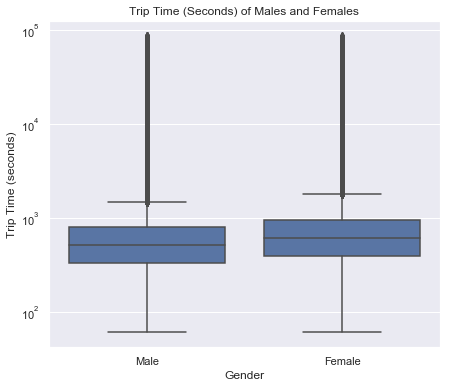

In [27]:
#plot trip time of males and females
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sb.boxplot(data = df_18_3, x = 'member_gender', y = 'duration_sec', color = base_color);
plt.xlabel("Gender")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) of Males and Females");

## Observations and next steps
We can see that the median as weel as the values for the first quartile (Q1) and the third quartile (Q3) with regard to the duration of rides conducted by females are higher than by males. Now we want to see duration of rides across different days.

**Trip time across different days of the week**

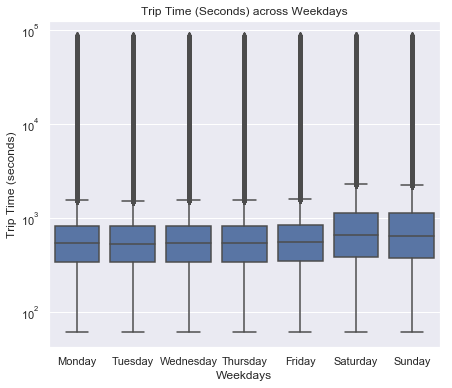

In [28]:
#put weekdays in right order and use log scale
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.boxplot(data = df_18, x = 'weekday', y = 'duration_sec', color = base_color, order = order);
plt.xlabel("Weekdays")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) across Weekdays");

## Observations and next steps
We can see that the median as well as the values for Q1 and Q3 with regard to the duration of rides during the weekend are higher than during weekdays. Now we want to see duration of rides across different user types.

**Duration of rides between different user types**<br>
* "Subscriber" = Member
* "Customer" = Casual

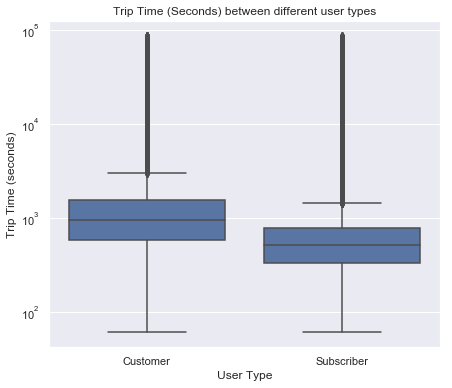

In [30]:
#plot trip time between different user types with a log scale
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sb.boxplot(data = df_18, x = 'user_type', y = 'duration_sec', color = base_color);
plt.xlabel("User Type")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) between different user types");

## Observations and next steps
We can see that the median as well as the values for Q1 and Q3 with regard to the duration of rides of customers are higher than of subscribers. Now we want to see the distribution of customer's and subscriber's rides across different days.

**Distribution of customer's and subscriber's rides across different days.**

In [31]:
#get ride counts of 2 user types per weekday
users = df_18.groupby(['weekday'])['user_type'].value_counts()
users

weekday    user_type 
Friday     Subscriber    248921
           Customer       41469
Monday     Subscriber    260814
           Customer       33759
Saturday   Subscriber    122745
           Customer       52869
Sunday     Subscriber    108240
           Customer       45074
Thursday   Subscriber    276609
           Customer       37515
Tuesday    Subscriber    285185
           Customer       34147
Wednesday  Subscriber    281040
           Customer       35334
Name: user_type, dtype: int64

In [32]:
#convert series to dataframe
df_users = users.to_frame()
df_users

user_type
weekday   user_type            
Friday    Subscriber     248921
          Customer        41469
Monday    Subscriber     260814
          Customer        33759
Saturday  Subscriber     122745
          Customer        52869
Sunday    Subscriber     108240
          Customer        45074
Thursday  Subscriber     276609
          Customer        37515
Tuesday   Subscriber     285185
          Customer        34147
Wednesday Subscriber     281040
          Customer        35334

In [33]:
#rename columns
df_users.rename(columns={'user_type':'ride_counts'}, inplace=True)

In [34]:
df_users

ride_counts
weekday   user_type              
Friday    Subscriber       248921
          Customer          41469
Monday    Subscriber       260814
          Customer          33759
Saturday  Subscriber       122745
          Customer          52869
Sunday    Subscriber       108240
          Customer          45074
Thursday  Subscriber       276609
          Customer          37515
Tuesday   Subscriber       285185
          Customer          34147
Wednesday Subscriber       281040
          Customer          35334

In [35]:
#adjust rows and columns
df_users_1 = df_users.unstack(level=1)
df_users_1

ride_counts           
user_type    Customer Subscriber
weekday                         
Friday          41469     248921
Monday          33759     260814
Saturday        52869     122745
Sunday          45074     108240
Thursday        37515     276609
Tuesday         34147     285185
Wednesday       35334     281040

In [36]:
#simplify column levels
df_users_1.columns = df_users_1.columns.droplevel(0)

In [37]:
df_users_1

user_type,Customer,Subscriber
weekday,,
Friday,41469,248921
Monday,33759,260814
Saturday,52869,122745
Sunday,45074,108240
Thursday,37515,276609
Tuesday,34147,285185
Wednesday,35334,281040


In [38]:
#change order of the rows
df_users_1.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

user_type,Customer,Subscriber
weekday,,
Monday,33759,260814
Tuesday,34147,285185
Wednesday,35334,281040
Thursday,37515,276609
Friday,41469,248921
Saturday,52869,122745
Sunday,45074,108240


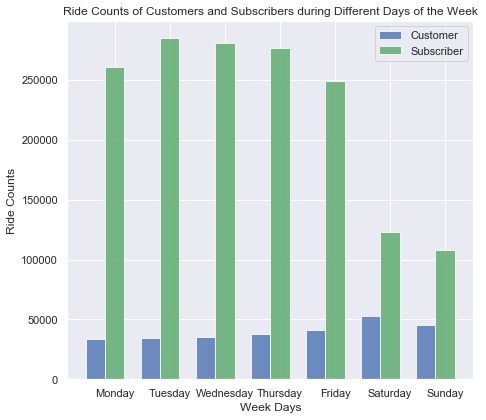

In [39]:
#data to plot
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_users_1
n_groups = 7

#create plot
fig, ax = plt.subplots(figsize=(7, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df_users_1.loc[order].Customer, bar_width,
                alpha=opacity,
                color='b',
                label='Customer')

rects2 = plt.bar(index + bar_width, df_users_1.loc[order].Subscriber, bar_width,
                alpha=opacity,
                color='g',
                label='Subscriber')

plt.xlabel('Week Days')
plt.ylabel('Ride Counts')
plt.title('Ride Counts of Customers and Subscribers during Different Days of the Week')
plt.xticks(index + bar_width, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend()

plt.tight_layout()
plt.show()


### Observations

In this part of the observation, we have been was mainly interested in different trip times between males and females as well as between user groups (customers and subscribers). From the plots above, we can realize that the median of trip duration for females is higher than for males and that the median of trip duration for customers is higher than for subscribers. We can also see that the median of trip duration during the weekend is higher than during working days.<br><br> 

We can observe one interesting relationship between ride counts of different user groups during different days of the week. The ride counts of subscribers are higher during the working days and less during the weekend. In contrast to that, the ride counts of customers are less during working days and higher during the weekend. It could be that most of the subscribers are using the bike in order to commute from their home to the office, but they might use it less frequently for leisure purpose.

## Multivariate Exploration

Here we want to find answers to the following questions:
* Where are the stations located and how many bikes are rented there per year?<br>

In [40]:
#get start station id's and their counts
station_count = df_18['start_station_id'].value_counts().reset_index()
station_count.head()

,index,start_station_id
0,15,38461
1,67,37617
2,30,35092
3,58,34918
4,81,33716


In [41]:
#rename columns
station_count.rename(columns={'index':'start_station_id', 'start_station_id':'ride_counts'}, inplace=True)

In [42]:
#drop row, where station id is 'n'
station_count_clean = station_count[station_count.start_station_id != 'n']

In [43]:
#list start station id's and their longitudes/ latitudes
station_long_lat = df_18[['start_station_id', 'start_station_longitude', 'start_station_latitude']]

In [44]:
#drop row, where station id is 'n'
station_long_lat_clean = station_long_lat[station_long_lat.start_station_id != 'n']

In [45]:
#drop duplicates
station_long_lat_clean_unique = station_long_lat_clean.drop_duplicates()

In [46]:
station = station_count_clean.merge(station_long_lat_clean_unique, on='start_station_id', how='inner')
station.head()

,start_station_id,ride_counts,start_station_longitude,start_station_latitude
0,15,38461,-122.394203,37.795392
1,67,37617,-122.395526,37.776639
2,30,35092,-122.395282,37.776598
3,58,34918,-122.417385,37.776619
4,81,33716,-122.393170,37.775880


In [47]:
#drop remaining duplicates
station_1 = station.drop_duplicates(subset=['start_station_id'], keep='first')

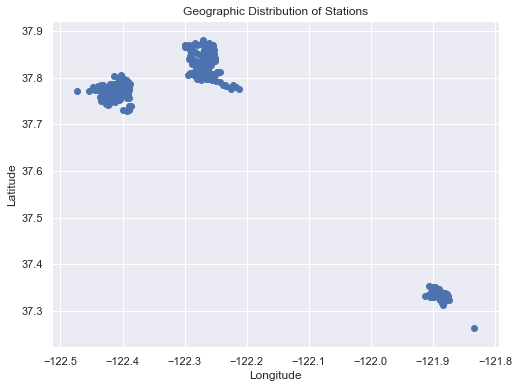

In [48]:
#plot geographic distribution of stations
plt.scatter(data = station_1, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Stations");

The spatial distribution of the points in the above scatter plot shows, that the stations are located in three different cities of the San Francisco Bay Area: The accumulation on the left side is San Francisco, the accumulation in the center in Oakland and the points in the lower right corner represent San Jose.<br>
In order to improve the readability of the scatter plot, I separate the data frame 'station_1' into three sub data frames by its longitude and latitude By doing that, each sub data frame would represent the stations, what are located in one of the three above mentioned cities.

In [49]:
#only keep rows, where station longitude is smaller than -122,35
#Get the stations of San Francisco
station_SF = station_1[station_1.start_station_longitude < -122.35]

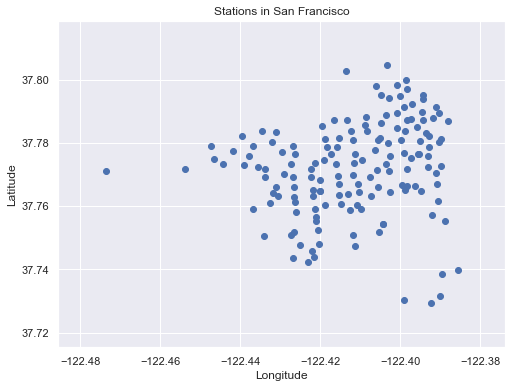

In [50]:
#show spatial distribution of stations in San Francisco
plt.scatter(data = station_SF, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in San Francisco");

In [51]:
#only keep rows, where station longitude is bigger than -122,35
#and smaller than -122.2
#Get the stations of Oakland
station_OA = station_1[(station_1['start_station_longitude'] > -122.35) & (station_1['start_station_longitude'] < -122.2)]

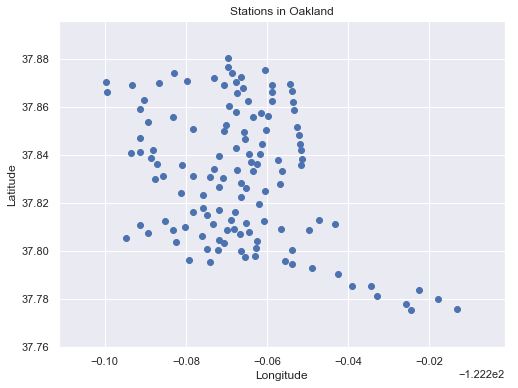

In [52]:
#show spatial distribution of stations in Oakland
plt.scatter(data = station_OA, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in Oakland");

In [53]:
#only keep rows, where station longitude is bigger than -122
#Get the stations of San Jose
station_SJ = station_1[station_1.start_station_longitude > -122]

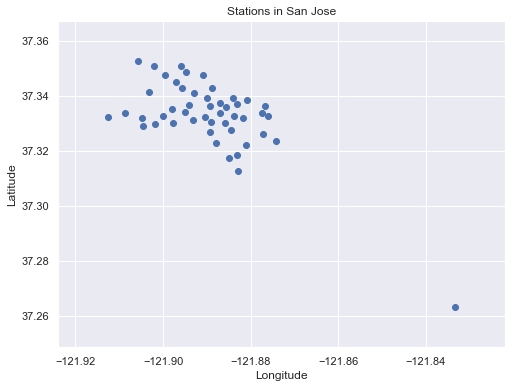

In [54]:
#show spatial distribution of stations in San Jose
plt.scatter(data = station_SJ, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in San Jose");

Now we want to adjust the size of the points in the scatter plots in order to indicate the annula number of rides, what started at these stations.

Next, I generalize the number of rides into 4 different categories (100, 200, 300, 400), in order to improve the readability of the below plots: 

In [55]:
#create a series from the column ride_counts
ride_counts_series = station_SF['ride_counts']

#define function
def f_cat(x):
    if x < 10000:
        return 100
    elif x <= 20000:
        return 200
    elif x <= 30000:
        return 300
    else:
        return 400

#create a new column in station_SF 
station_SF['count_cat'] = ride_counts_series.apply(f_cat)





c:\users\martin\anaconda2\envs\data-4\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


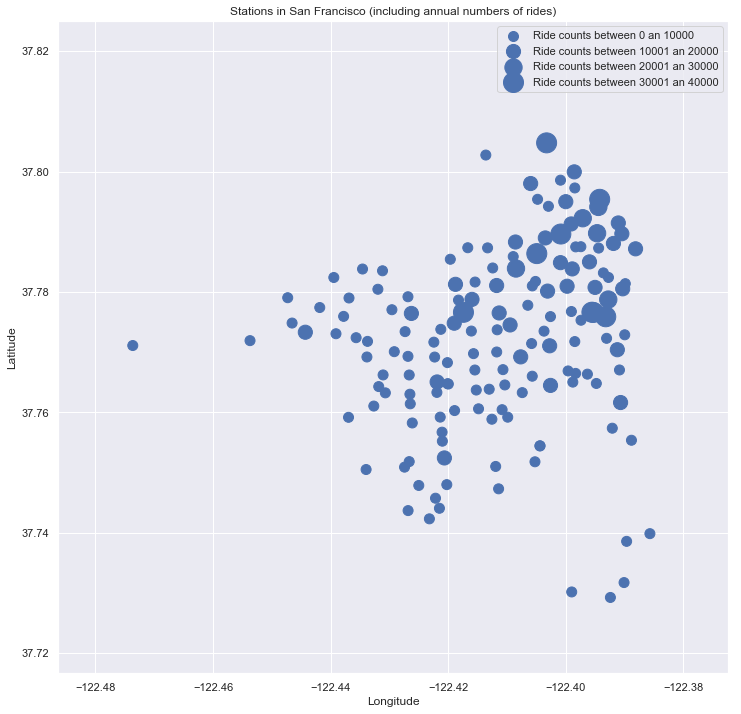

In [56]:
#show spatial distribution of stations in San Francisco (including annual numbers of rides)
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 12))
plt.scatter(data = station_SF, x = 'start_station_longitude', y = 'start_station_latitude', s = 'count_cat');


# dummy series for adding legend
sizes = [100, 200, 300, 400]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
L = plt.legend(legend_obj, sizes);
L.get_texts()[0].set_text('Ride counts between 0 an 10000')
L.get_texts()[1].set_text('Ride counts between 10001 an 20000')
L.get_texts()[2].set_text('Ride counts between 20001 an 30000')
L.get_texts()[3].set_text('Ride counts between 30001 an 40000')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in San Francisco (including annual numbers of rides)");


In [57]:
#create a series from the column ride_counts
ride_counts_series = station_OA['ride_counts']

#define function
def f_cat(x):
    if x < 10000:
        return 100
    elif x <= 20000:
        return 200
    elif x <= 30000:
        return 300
    else:
        return 400

#create a new column in station_SF 
station_OA['count_cat'] = ride_counts_series.apply(f_cat)

c:\users\martin\anaconda2\envs\data-4\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


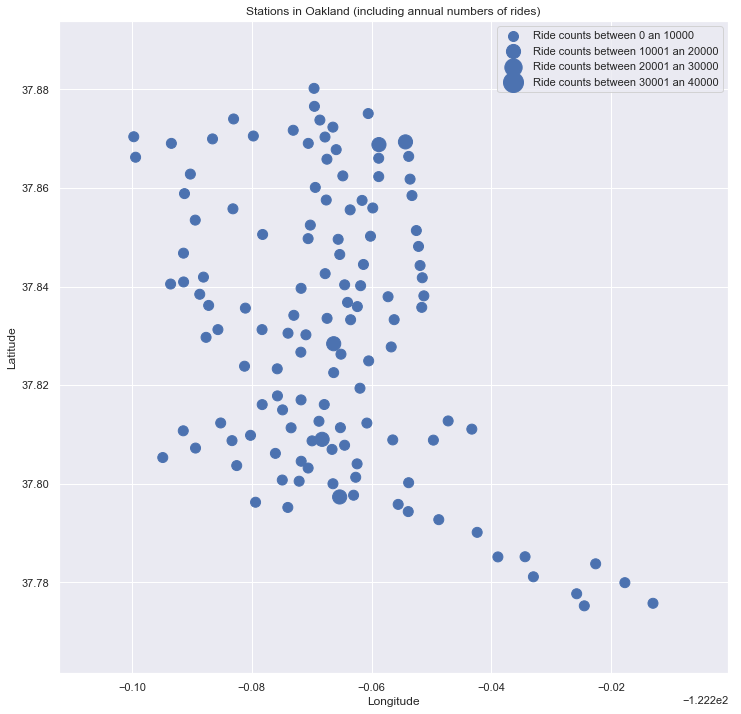

In [58]:
#show spatial distribution of stations in Oakland (including annual numbers of rides)
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 12))
plt.scatter(data = station_OA, x = 'start_station_longitude', y = 'start_station_latitude', s = 'count_cat');

# dummy series for adding legend
sizes = [100, 200, 300, 400]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
L = plt.legend(legend_obj, sizes);
L.get_texts()[0].set_text('Ride counts between 0 an 10000')
L.get_texts()[1].set_text('Ride counts between 10001 an 20000')
L.get_texts()[2].set_text('Ride counts between 20001 an 30000')
L.get_texts()[3].set_text('Ride counts between 30001 an 40000')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in Oakland (including annual numbers of rides)");

In [59]:
#create a series from the column ride_counts
ride_counts_series = station_SJ['ride_counts']

#define function
def f_cat(x):
    if x < 10000:
        return 100
    elif x <= 20000:
        return 200
    elif x <= 30000:
        return 300
    else:
        return 400

#create a new column in station_SF 
station_SJ['count_cat'] = ride_counts_series.apply(f_cat)

c:\users\martin\anaconda2\envs\data-4\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


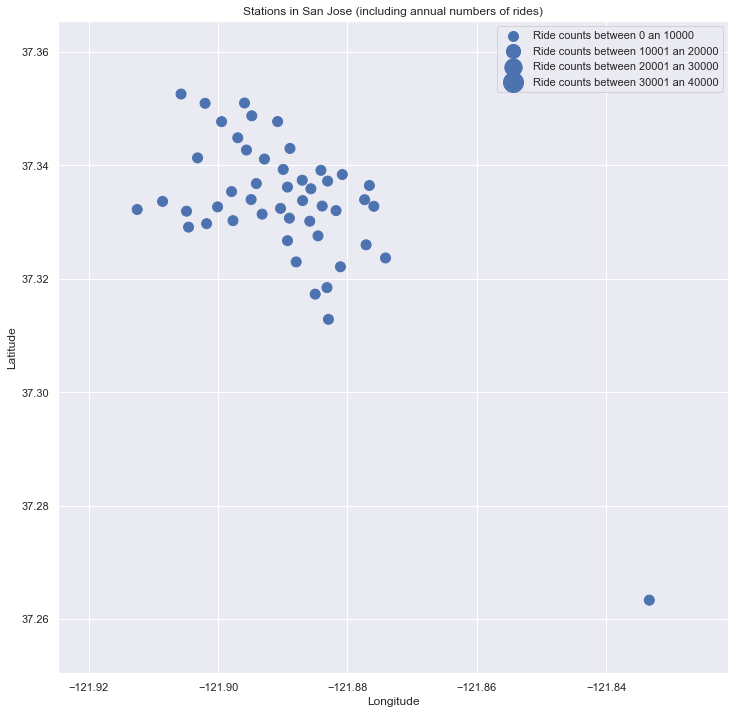

In [60]:
#show spatial distribution of stations in San Jose (including annual numbers of rides)
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 12))
plt.scatter(data = station_SJ, x = 'start_station_longitude', y = 'start_station_latitude', s = 'count_cat');

# dummy series for adding legend
sizes = [100, 200, 300, 400]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
L = plt.legend(legend_obj, sizes);
L.get_texts()[0].set_text('Ride counts between 0 an 10000')
L.get_texts()[1].set_text('Ride counts between 10001 an 20000')
L.get_texts()[2].set_text('Ride counts between 20001 an 30000')
L.get_texts()[3].set_text('Ride counts between 30001 an 40000')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Stations in San Jose (including annual numbers of rides)");

### Observations

In this part I observed that the dataset actually consists of three different cities in the San Francisco Bay Area. I also found out that the stations in San Francisco have the highest number of ride counts (they mainly concentrate in the Financial District), followed by the cities of Oakland and San Jose. 
